In [2]:
import itertools
import random
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path 
import sys
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
import os
import logging
import threading
import time

In [4]:
YEARS = [str(y) for y in range(1990,2019)]
df_path = 'myDATA/01- france_collaboration_df.csv'
all_jsons = [('Data/COMP/' + 'COMP-'+year+'.json') for year in YEARS] 

In [199]:
# retrieve some infos about the data
all_auth = set()

n_aut_by_y = []
n_newAut_by_y = []

totPub = 0
n_pub_by_y = []
n_newPub_by_y = []

totColl = 0
n_collab_by_y = []
n_newCollab_by_y = []

for i in range(len(YEARS)):
    year = YEARS[i]
    file_path = all_jsons[i]
    #print("\n...", year, "...")
    f = open(file_path)
    json_file = json.load(f)
    #print("  #publications", len(json_file))
    
    n_newPub_by_y.append(len(json_file))
    
    totPub += len(json_file)
    n_pub_by_y.append(totPub)

    
    seen = {}
    new_aut = 0
    # iterate over publications
    for pub in json_file: 
        for aut in pub['authors']:
            curr_aut = aut['id']
            if(curr_aut not in seen):
                seen[curr_aut] = set()
            if(curr_aut not in all_auth):
                new_aut += 1
            all_auth.add(curr_aut)
            for other_aut in pub['authors']:
                curr_collab = other_aut['id']
                if(curr_aut != curr_collab):
                    seen[curr_aut].add(curr_collab)
                    
    # print("  #authors ", len(seen))
    # print("  #newAuthors ", new_aut)
    
    curr_n_coll = 0
    for aut in seen:
        curr_n_coll += len(seen[aut])
    
    totColl += curr_n_coll
    n_collab_by_y.append(totColl)
    n_newCollab_by_y.append(curr_n_coll)
    
    n_aut_by_y.append(len(all_auth))
    n_newAut_by_y.append(new_aut)
    
#print("\n TOTAL #Authors", len(all_auth))

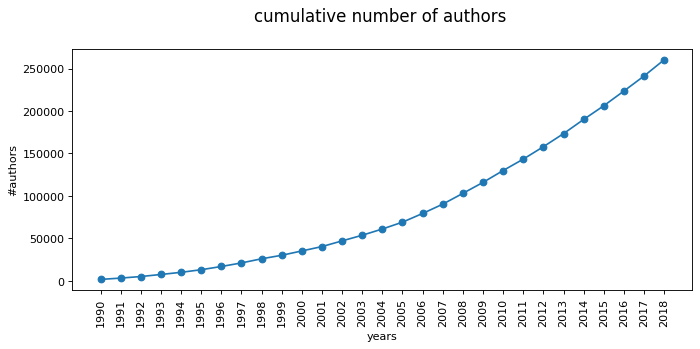

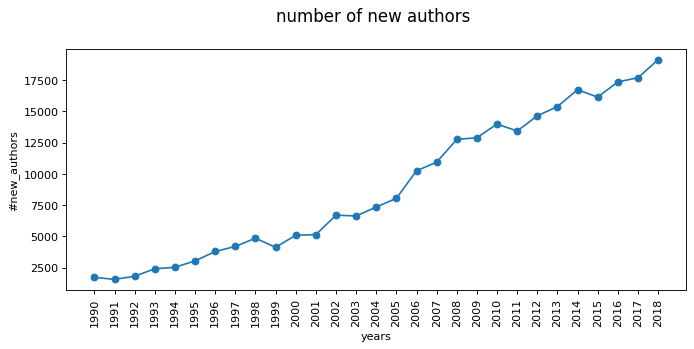

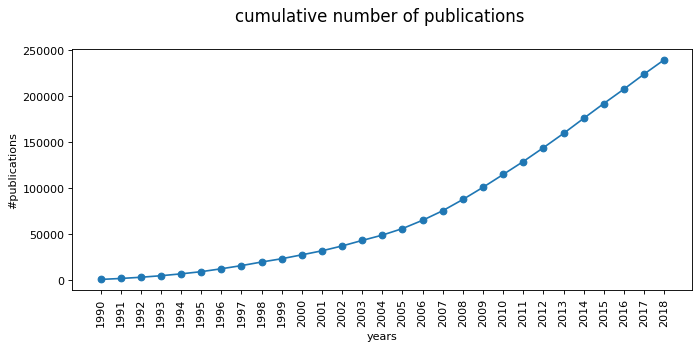

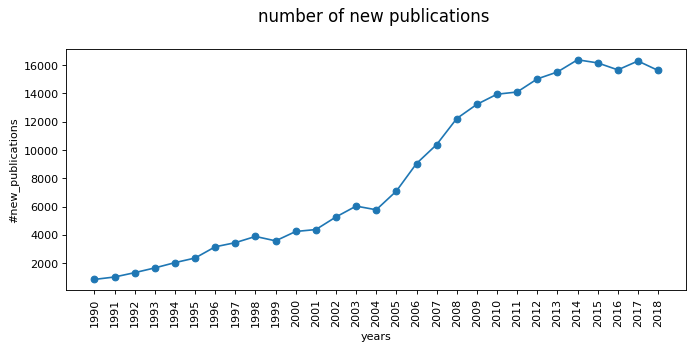

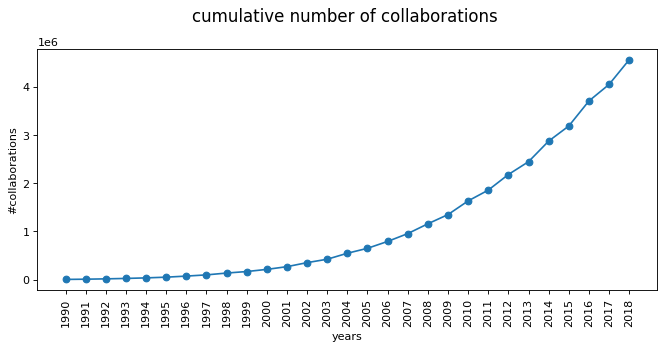

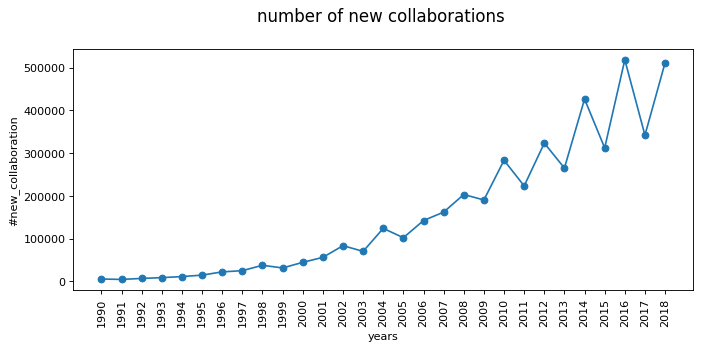

In [208]:
## Plot infos about data

plt.figure(figsize=(10, 4), dpi=80)
plt.xlabel("years")
plt.ylabel("#authors")
plt.title("cumulative number of authors \n", fontdict = {'fontsize' : 15})    
plt.xticks(rotation='vertical')
plt.plot(YEARS, n_aut_by_y)
plt.scatter(YEARS, n_aut_by_y)

plt.figure(figsize=(10, 4), dpi=80)
plt.xlabel("years")
plt.ylabel("#new_authors")
plt.title("number of new authors \n", fontdict = {'fontsize' : 15})
plt.xticks(rotation='vertical')
plt.plot(YEARS, n_newAut_by_y)
plt.scatter(YEARS, n_newAut_by_y)

plt.figure(figsize=(10, 4), dpi=80)
plt.xlabel("years")
plt.ylabel("#publications")
plt.title("cumulative number of publications \n", fontdict = {'fontsize' : 15})
plt.xticks(rotation='vertical')
plt.plot(YEARS, n_pub_by_y)
plt.scatter(YEARS, n_pub_by_y)

plt.figure(figsize=(10, 4), dpi=80)
plt.xlabel("years")
plt.ylabel("#new_publications")
plt.title("number of new publications \n", fontdict = {'fontsize' : 15})
plt.xticks(rotation='vertical')
plt.plot(YEARS, n_newPub_by_y)
plt.scatter(YEARS, n_newPub_by_y)

plt.figure(figsize=(10, 4), dpi=80)
plt.xlabel("years")
plt.ylabel("#collaborations")
plt.title("cumulative number of collaborations \n", fontdict = {'fontsize' : 15})
plt.xticks(rotation='vertical')
plt.plot(YEARS, n_collab_by_y)
plt.scatter(YEARS, n_collab_by_y)

plt.figure(figsize=(10, 4), dpi=80)
plt.xlabel("years")
plt.ylabel("#new_collaboration")
plt.title("number of new collaborations \n", fontdict = {'fontsize' : 15})
plt.xticks(rotation='vertical')
plt.plot(YEARS, n_newCollab_by_y)
plt.scatter(YEARS, n_newCollab_by_y)

In [127]:
# Build the ID column of the dataset
df = pd.DataFrame(columns=np.concatenate((["ID"], YEARS), axis=None))
df["ID"] = list(all_auth)
df.to_csv(df_path, index=False)
df

,ID,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,35228167400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7006306265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55664141300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35761076900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8907937400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260318,57192872591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260319,57191906840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260320,6506297899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260321,36444799900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
# build the non_cumulative collaboration dataset
df=pd.read_csv(df_path)

# all_auth = set()
for i in range(len(YEARS)):
    print('\n', YEARS[i])
    year = YEARS[i]
    file_path = all_jsons[i]
    
    f = open(file_path)
    json_file = json.load(f)
    
    seen = {}
    c = 0
    # iterate over publications
    for pub in json_file: 
        
        if(c%150==0 or c==len(json_file)):
            print('  -> iterating over publications', c, '/', len(json_file), end='\r')
        
        for aut in pub['authors']:
            curr_aut = aut['id']
            if(curr_aut not in seen):
                seen[curr_aut] = set()
            for other_aut in pub['authors']:
                curr_collab = other_aut['id']
                if(curr_aut != curr_collab):
                    seen[curr_aut].add(curr_collab)
        c += 1
    
    c = 0
    
    print()
    for aut in seen:
        
        if(c%150==0 or c==len(seen)-1):
            print('  -> adding authors to df', c, '/', len(seen), end='\r')
        
        num_collabs = len(seen[aut])
        #if(aut not in all_auth):
        #    df = df.append({'ID':aut, year:num_collabs}, ignore_index=True)
        #    all_auth.add(aut)
        #else:
        df[year][df.ID == int(aut)] = num_collabs
        c += 1
        
    df.to_csv(df_path, index=False)


 1990
  -> iterating over publications 750 / 851
  -> adding authors to df 1741 / 1742
 1991
  -> iterating over publications 900 / 1022
  -> adding authors to df 1910 / 1911
 1992
  -> iterating over publications 1200 / 1329
  -> adding authors to df 2464 / 2465
 1993
  -> iterating over publications 1650 / 1664
  -> adding authors to df 3298 / 3299
 1994
  -> iterating over publications 1950 / 2037
  -> adding authors to df 3942 / 3943
 1995
  -> iterating over publications 2250 / 2362
  -> adding authors to df 4837 / 4838
 1996
  -> iterating over publications 3150 / 3155
  -> adding authors to df 6170 / 6171
 1997
  -> iterating over publications 3300 / 3447
  -> adding authors to df 7183 / 7184
 1998
  -> iterating over publications 3750 / 3886
  -> adding authors to df 8475 / 8476
 1999
  -> iterating over publications 3450 / 3574
  -> adding authors to df 7852 / 7853
 2000
  -> iterating over publications 4200 / 4237
  -> adding authors to df 9546 / 9547
 2001
  -> iterating ov

In [10]:
# build a cumulative collaboration dataset
df=pd.read_csv(df_path)
df = df.fillna(0)
df[YEARS] = df[YEARS].applymap(np.int64)

for year in YEARS[1:]:
    df[year] = df[str(int(year)-1)] + df[year]

df.to_csv(df_path, index=False)
df

,ID,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,35228167400,0,0,0,0,0,0,0,0,0,...,0,0,0,0,56,56,56,56,56,56
1,7006306265,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,55664141300,0,0,0,0,0,0,0,0,0,...,0,2,2,2,2,2,2,2,2,2
3,35761076900,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
4,8907937400,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229972,16039060500,0,0,0,0,0,0,0,0,0,...,0,0,0,54,54,54,54,54,54,54
229973,57191344334,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,29,47
229974,6701360925,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
229975,55734843800,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,10,10,10,10,10
